### Import libraries

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset into a Pandas DataFrame and display the first few rows.

In [198]:
data = pd.read_csv('Housing.csv')
print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


### Perform EDA

#### Check the dataset's structure, missing values, and summary statistics.

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [204]:
data.describe(include='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


### Visualize the dataset using pair plots to understand relationships.

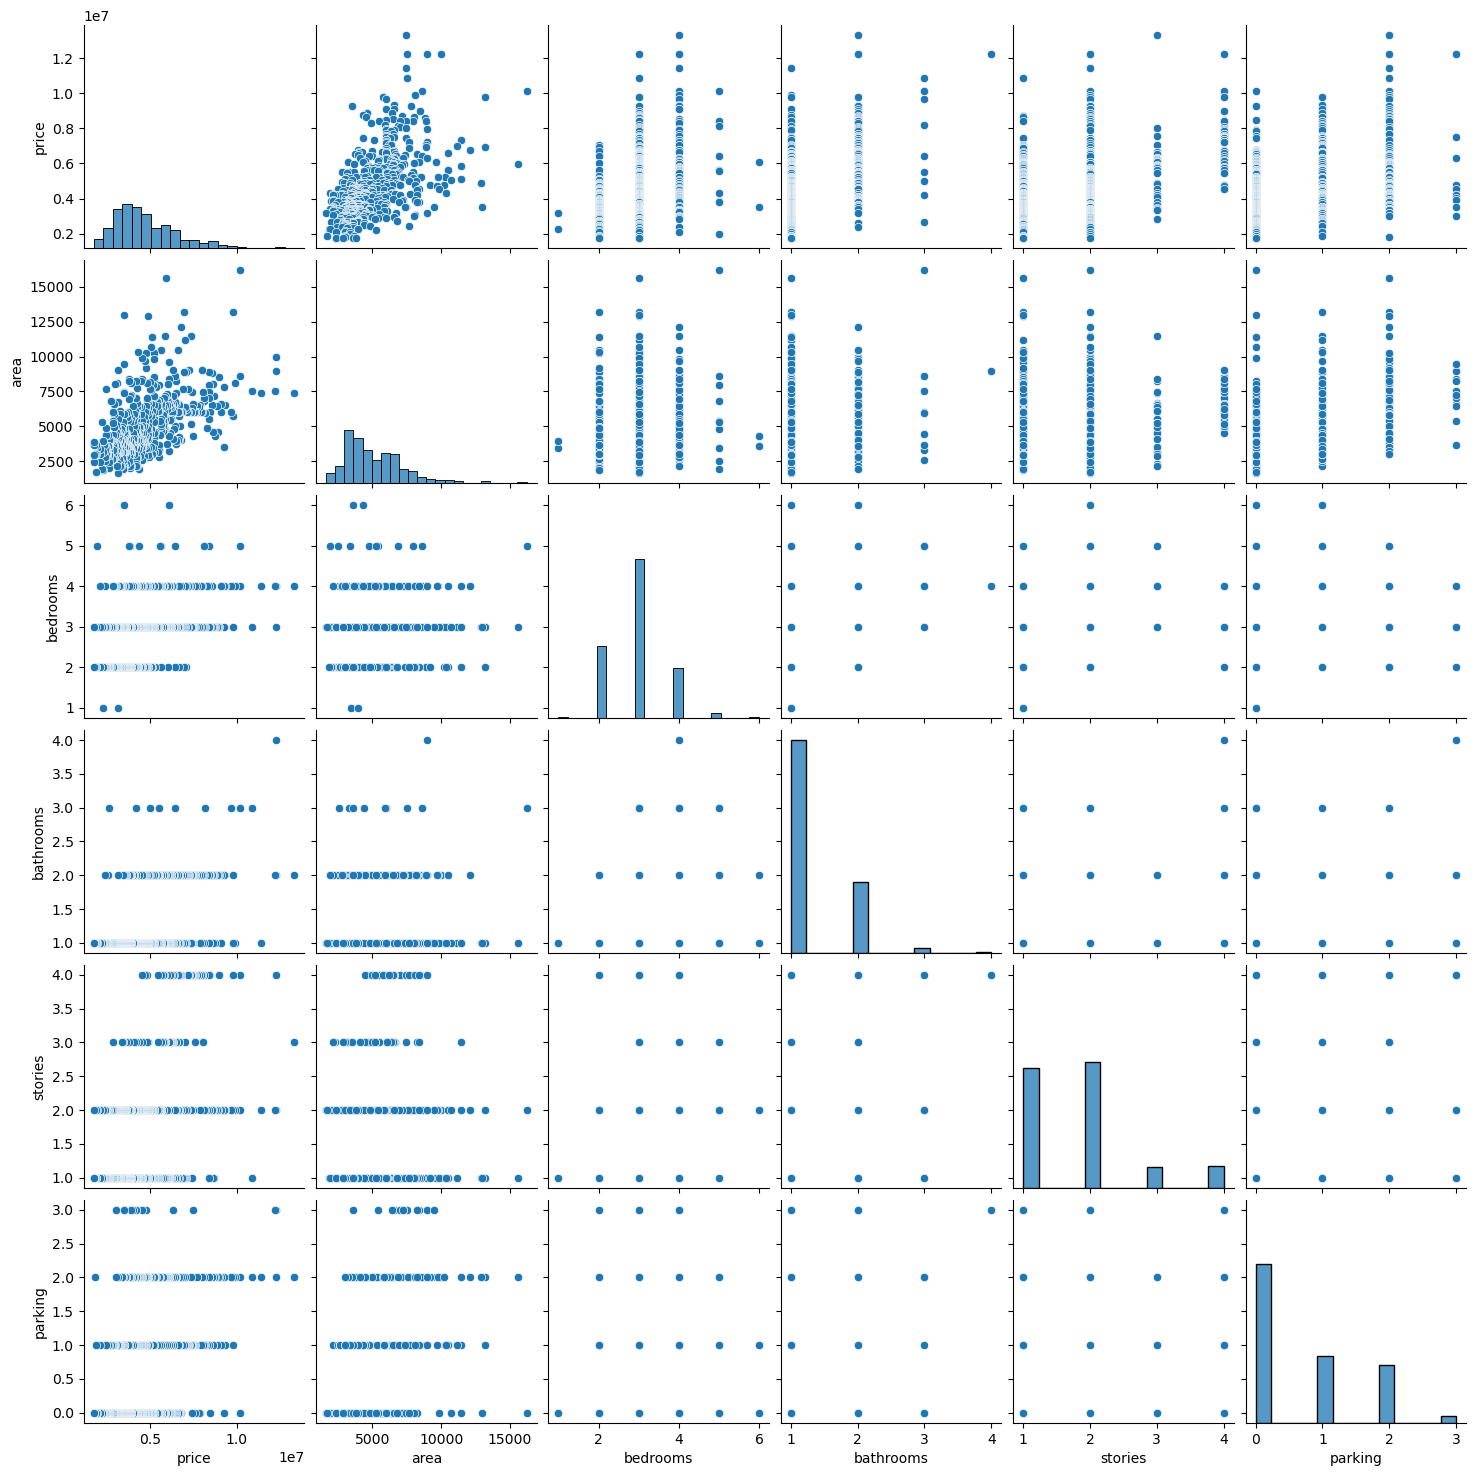

In [207]:
sns.pairplot(data)
plt.show()

#### Check how many unique values are there in each variable of dataframe

In [209]:
print(data.nunique())

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64


#### Checking if there is any duplicate values in the dataframe

In [219]:
print(data.duplicated().sum())

0


#### Checking if there is any missing values in the dataframe

In [222]:
print(data.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


### Check if there is linear relationship between the area and price of the dataset

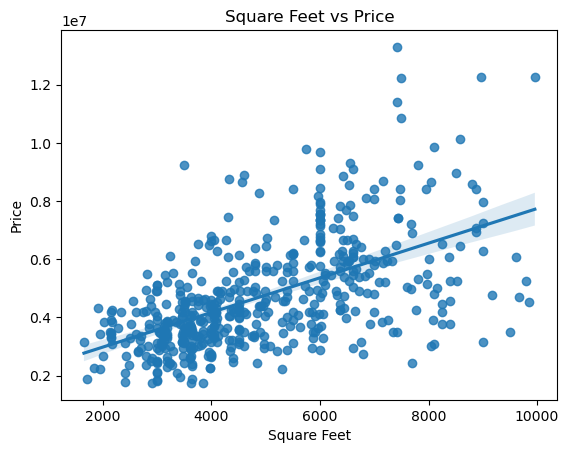

In [289]:
sns.regplot(x=data['area'], y=data['price'])
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('Square Feet vs Price')
plt.show()

### Choose the independent variable (feature) and the dependent variable (target).

In [291]:
X = data[['area']]
y = data[['price']]

### Check for Outliers

In [293]:
Q1 = data['area'].quantile(0.25)
Q3 = data['area'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['area'] >= lower_bound) & (data['area'] <= upper_bound)]

### Normalize Features

In [295]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

### Split the dataset into training (80%) and testing (20%) sets.

In [297]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train a Simple Linear Regression model using the training data.

In [299]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Predict house prices for the test set and evaluate model performance.

In [301]:
y_pred = model.predict(X_test)
print(y_pred)

[[4112585.37113421]
 [3056763.88707842]
 [6800130.96691257]
 [5182949.85083815]
 [6608163.42435698]
 [3554134.3382452 ]
 [4048596.19028234]
 [3926435.02683787]
 [5604696.72463453]
 [3203939.00303771]
 [5619239.72028269]
 [4892089.93787512]
 [4135854.16417125]
 [6520905.45046807]
 [3868263.04424526]
 [5555250.53943082]
 [7602904.32669053]
 [3263274.42528217]
 [5508712.95335674]
 [5182949.85083815]
 [3798456.66513414]
 [2877012.46086727]
 [3430228.01532295]
 [6608163.42435698]
 [3470366.68331184]
 [4159122.95720829]
 [6230045.53750504]
 [5299293.81602336]
 [5182949.85083815]
 [4340619.54289722]
 [3554134.3382452 ]
 [6276583.12357913]
 [4926993.12743068]
 [3833359.8546897 ]
 [4647767.61098618]
 [5299293.81602336]
 [5200401.44561593]
 [4159122.95720829]
 [5299293.81602336]
 [5689046.09939381]
 [3693747.09646745]
 [6679133.24311996]
 [4007875.80246752]
 [5683228.90113455]
 [4368542.09454167]
 [4252198.12935646]
 [5124777.86824554]
 [3658843.90691189]
 [4135854.16417125]
 [3996241.405949  ]


In [303]:
from sklearn.metrics import mean_squared_error, r2_score

print('Mean Squared Error : ', mean_squared_error(y_test, y_pred))
print('R-squared : ', r2_score(y_test, y_pred))

Mean Squared Error :  3415774069118.44
R-squared :  0.30549550968950756


In [305]:
print(model.score(X_test, y_test))

0.30549550968950756


### Plot the regression line against the actual data points.

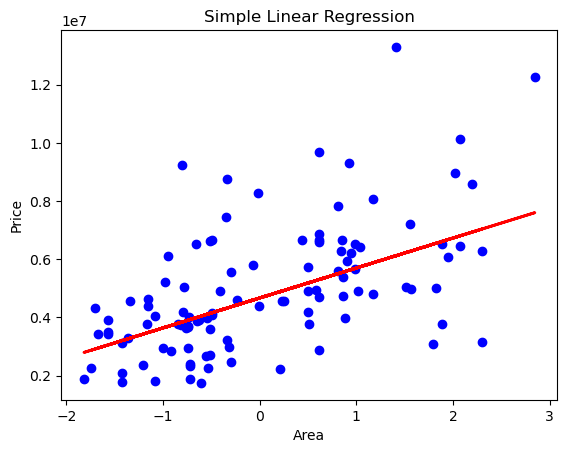

In [308]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression')
plt.show()

#### How to Improve the Model?

##### From our project, we observed a low R-squared value (~0.30), meaning our Simple Linear Regression model does not explain most of the variability in house prices. The key reason is missing important features: Prices depend on many factors (e.g., location, number of bedrooms, age, amenities), but we only used area as the predictor as we are building the project in Simple Linear Regression algorithm.

##### The current model is too simplistic and does not capture all the factors influencing house prices. By adding more features and trying advanced models like Multiple Linear regression or Decision Tree or Random Forest, we can significantly improve accuracy and business impact.